In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#№1
#Посмотрим на статистику самых забивающих игроков за все время

In [76]:
nba_stats = pd.read_csv('Seasons_Stats.csv')
nba_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [55]:
top_scores = nba_stats.groupby('Player').sum()[['PTS']].sort_values('PTS', ascending=False).head(10)
top_scores

,PTS
Player,
Kareem Abdul-Jabbar*,38387.0
Karl Malone*,36928.0
Wilt Chamberlain*,33953.0
Kobe Bryant,33643.0
Michael Jordan*,32292.0
Eddie Johnson,31852.0
Dirk Nowitzki,30260.0
Shaquille O'Neal*,29428.0
LeBron James,28787.0


Text(0.5, 1.0, 'Top 10 scored players')

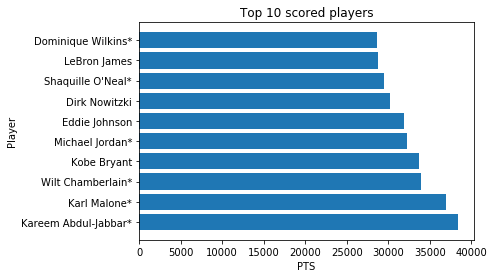

In [56]:
plt.barh(top_scores.index, top_scores['PTS'])
plt.xlabel('PTS')
plt.ylabel('Player')
plt.title('Top 10 scored players')
#Замый забивающий игрок за все время это Карим Абдул-Джабар

In [ ]:
#№2
#Растет ли средняя результативность матчей (82 матча в сезоне у каждой из 30 команд) за последние 40 лет

In [104]:
scores__year = nba_stats.groupby('Year').sum()[['PTS']].sort_values('Year', ascending=False).head(40)
scores__year.head()

,PTS
Year,
2017.0,282466.0
2016.0,269138.0
2015.0,278672.0
2014.0,269984.0
2013.0,256949.0


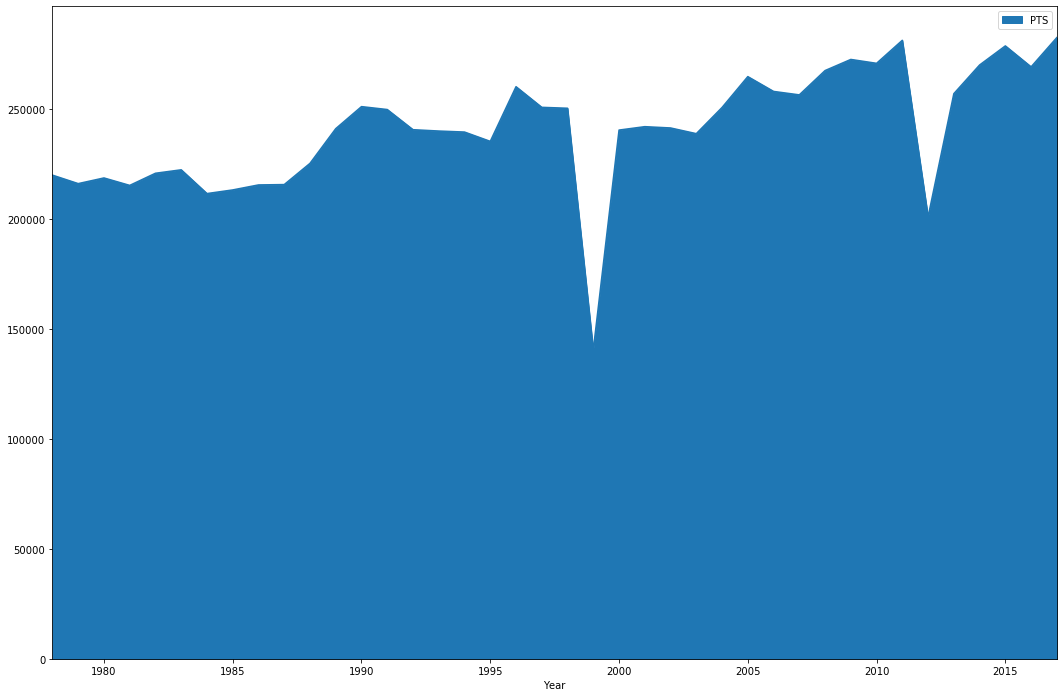

In [150]:
scores__year.plot(kind='area')
# plt.plot(scores__year.index, scores__year['PTS']/(82*15))
# plt.xlabel('AVG points')
# plt.ylabel('Year')
# plt.title('AVG points in a match')
#К сожалению, никакими манипуляциями не получилось преобразовать год в типу "int"
#Как мы видим, у нас существует 2 выброса в 1999 и в 2012 году, поэтому эти года мы анализироват не будем
#Видим, что c 1978 года результативность игр росла и достигла пика в 2011 году, далее результативность игр немного снизилась,
# но при этом видно, что в общей картине результативность игр с 2008 года по 2017 год остается примерно в одних приделах (НБА достаточно часто меняла правила для увеличения результативности игр, а следовательно и их зрелищности)
#Видны несколько пиков, особо характерный в 1996 - в этом сезоне полностью доминировала комнада Чикаго Буллз. Они закончили сезон с рекордными соотношением побед-поражений, а Майкл Джордан показывал очень высокую результативность в среднем за матч

In [107]:
import seaborn as sns

In [ ]:
#№3
#С помощью тепловой диаграммы можем наглядно увидеть, какие команды были самыми забиваемыми в разные годы

In [109]:
years_teams_scores = nba_stats.pivot_table(
                        index='Year', 
                        columns='Tm', 
                        values='PTS', 
                        aggfunc=sum).fillna(0).applymap(float)

years_teams_scores

Tm,AND,ATL,BAL,BLB,BOS,BRK,BUF,CAP,CHA,CHH,...,SYR,TOR,TOT,TRI,UTA,VAN,WAS,WAT,WSB,WSC
Year,,,,,,,,,,,,,,,,,,,,,
1950.0,5589.0,0.0,0.0,4973.0,5420.0,0.0,0.0,0.0,0.0,0.0,...,5429.0,0.0,13756.0,5313.0,0.0,0.0,0.0,4921.0,0.0,5201.0
1951.0,0.0,0.0,0.0,4433.0,5604.0,0.0,0.0,0.0,0.0,0.0,...,5150.0,0.0,9791.0,5346.0,0.0,0.0,0.0,0.0,0.0,1625.0
1952.0,0.0,0.0,0.0,4740.0,6027.0,0.0,0.0,0.0,0.0,0.0,...,5721.0,0.0,3891.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953.0,0.0,0.0,0.0,5887.0,6258.0,0.0,0.0,0.0,0.0,0.0,...,6081.0,0.0,7074.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954.0,0.0,0.0,0.0,5206.0,5961.0,0.0,0.0,0.0,0.0,0.0,...,6013.0,0.0,4613.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013.0,0.0,8032.0,0.0,0.0,7818.0,7944.0,0.0,0.0,7661.0,0.0,...,0.0,7971.0,15726.0,0.0,8038.0,0.0,7644.0,0.0,0.0,0.0
2014.0,0.0,8282.0,0.0,0.0,7892.0,8079.0,0.0,0.0,7942.0,0.0,...,0.0,8305.0,21502.0,0.0,7791.0,0.0,8254.0,0.0,0.0,0.0
2015.0,0.0,8409.0,0.0,0.0,8312.0,8038.0,0.0,0.0,0.0,0.0,...,0.0,8527.0,32637.0,0.0,7801.0,0.0,8080.0,0.0,0.0,0.0


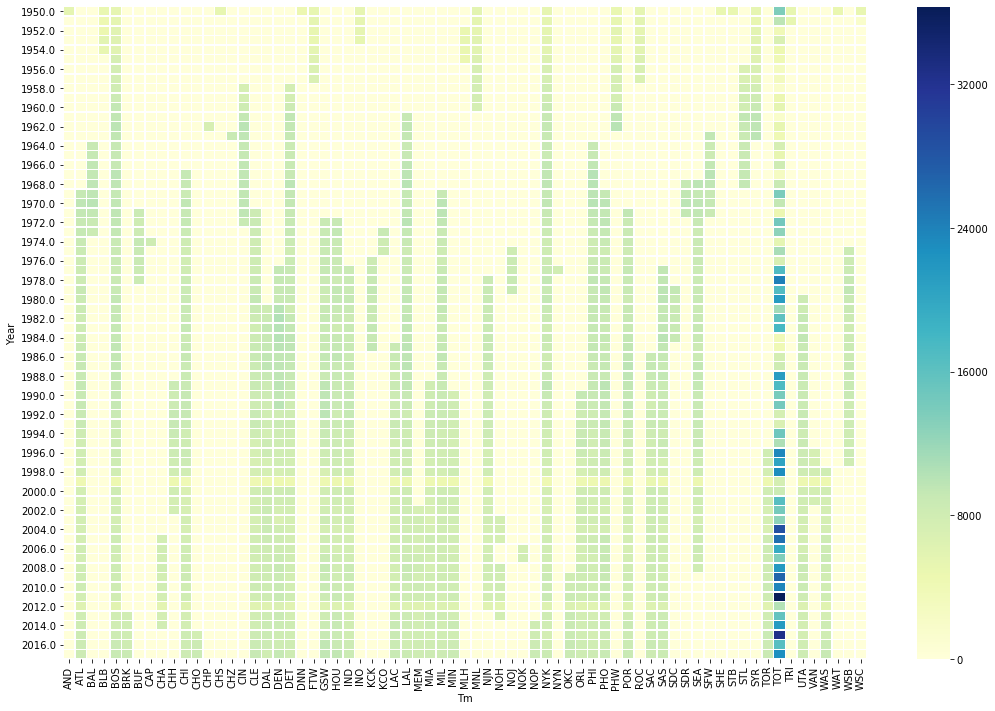

In [115]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,12
ax = sns.heatmap(years_teams_scores, linewidths=0.5, cmap="YlGnBu")
#В большинстве сезонов больше всего забивала команда с аббревиатурой TOT

In [ ]:
#№4
#Определим, из каких колледжей больше всего игроков NBA

In [129]:
players = pd.read_csv('Players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [136]:
collage = players.groupby('collage').count()[['Player']].sort_values('Player', ascending=False).head(10)
collage

,Player
collage,
University of Kentucky,89
"University of California, Los Angeles",86
University of North Carolina,67
University of Kansas,59
Duke University,56
University of Notre Dame,51
Indiana University,49
Syracuse University,49
St. John's University,48


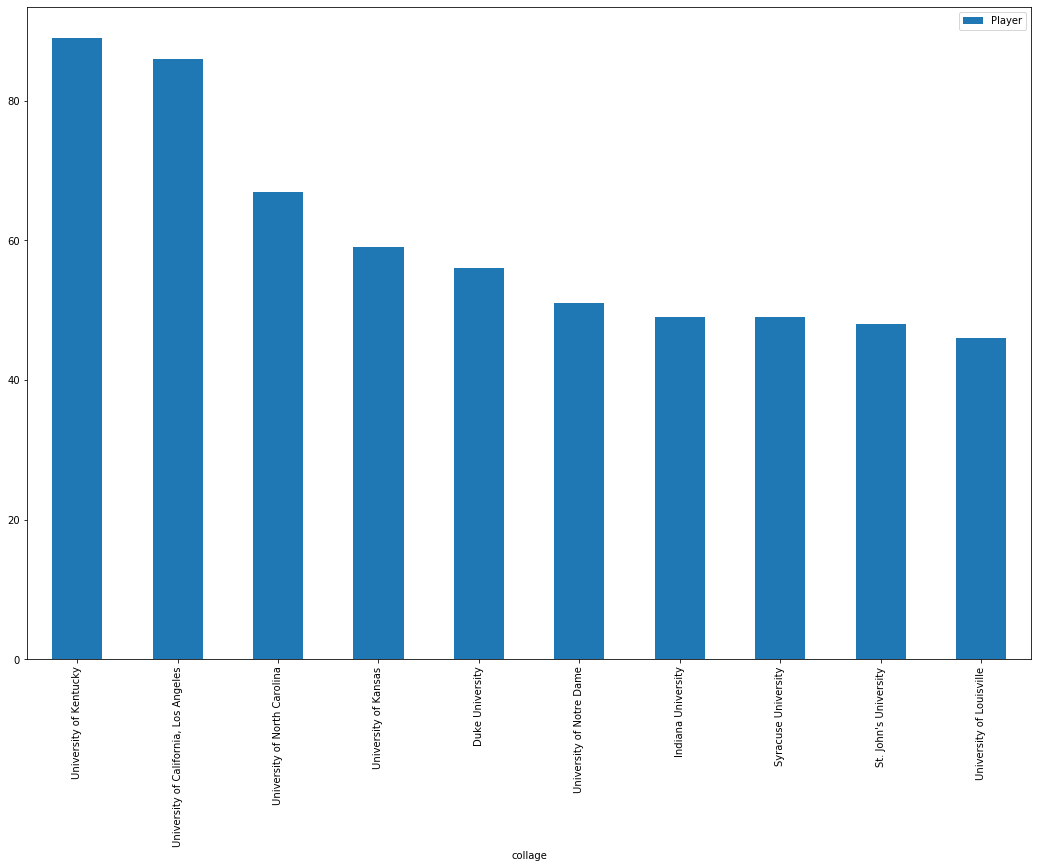

In [137]:
collage.plot(kind='bar')
#Как видим, по кол-ву игроков НБА, сильно оторвались 2 колледжа: University of Kentucky и University of California
#Видимо, 2 этих колледжа являются самыми сильными с точки подготовки студентов для дальнейшей игры в профессиональный баскетбол

In [ ]:
#№5
#Посмотрим, менялся ли средний рост игроков по году их рождения

In [140]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [146]:
players_height = players.groupby('born').mean()[['height']].sort_values('born', ascending=True)
players_height

,height
born,
1913.0,185.000000
1914.0,180.000000
1915.0,198.000000
1917.0,189.333333
1918.0,186.200000
...,...
1993.0,199.920000
1994.0,199.829268
1995.0,204.258065


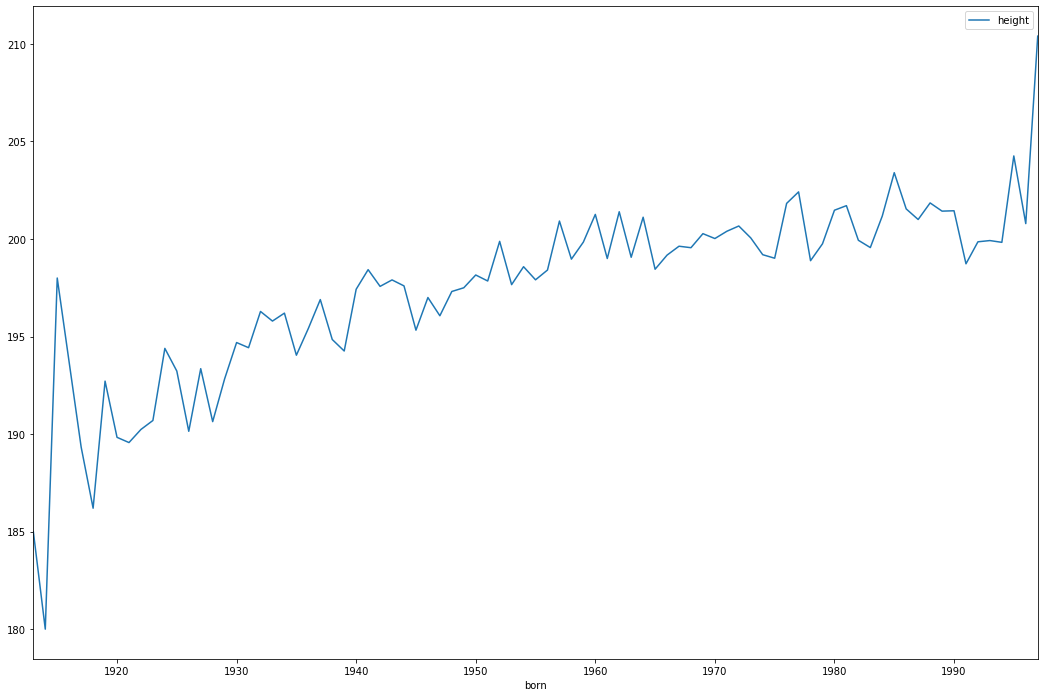

In [147]:
players_height.plot()
#Видно, что средний рост игроков в общей тенденции растет, особенно виден резкий скачекв 1997 году.
#Это может быть обусловленно тем,что а баскетболе имеют преимущество более высокие игроки и в профессиональный спорт стали попадать именно такие
#к тому же до нелавнего времени будущие игроки применяли гармон роста